## Checking penalties of atom assigned molecules

In [32]:
import json
import pandas as pd
import numpy as np

In [3]:
dikt = "/home/ifender/SOS/SMILES_or_SELFIES/atomtype_embedding_visualisation/assignment_dicts/dikt_pretraindataset.json"

In [4]:
# read in dikt fropm .json
with open(dikt, 'r') as file:
    loaded_dikt = json.load(file)

{'CN(C)C(=O)c1ccc2oc(-c3cc(Cl)cc(Cl)c3Cl)nc2c1': {'posToKeep': None, 'smi_clean': None, 'atom_types': None, 'max_penalty': None}, 'CC(C)C1CCC(C(=O)Cc2cn(C)nn2)CC1': {'posToKeep': [0, 1, 3, 5, 7, 8, 9, 11, 14, 16, 17, 19, 20, 22, 24, 25, 28, 29], 'smi_clean': ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'c', 'c', 'n', 'C', 'n', 'n', 'C', 'C'], 'atom_types': ['c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c', 'o', 'c3', 'cc', 'cd', 'na', 'c3', 'nd', 'nc', 'c3', 'c3'], 'max_penalty': 67.2}, 'Cc1ccc(C)c(C(C#N)Cc2c[nH]c3ccccc23)c1': {'posToKeep': [0, 1, 3, 4, 5, 7, 9, 11, 13, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 32], 'smi_clean': ['C', 'c', 'c', 'c', 'c', 'C', 'c', 'C', 'C', 'N', 'C', 'c', 'c', '[nH]', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], 'atom_types': ['c3', 'ca', 'ca', 'ca', 'ca', 'c3', 'ca', 'c3', 'c1', 'n1', 'c3', 'cc', 'cd', 'na', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca'], 'max_penalty': 223.0}, 'Cc1ccc(C)c([C@@H](C#N)Cc2c[nH]c3ccccc23)c1': {'posToKeep': [0, 1, 3, 4, 5, 7, 9, 1

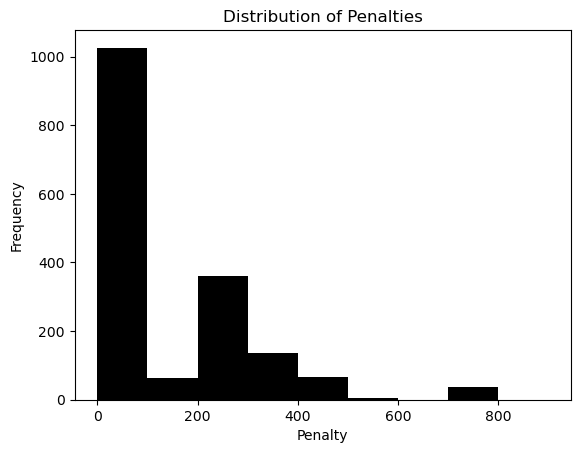

In [23]:
print(loaded_dikt)
# plot all the penalties assigned in first dikt to SMILES
import matplotlib.pyplot as plt

penalties = [v['max_penalty'] for k, v in loaded_dikt.items() if v['max_penalty'] is not None]
print(penalties)
print(max(penalties))
print(len(penalties))
print(len(loaded_dikt))
assigned = [v['atom_types'] for k,v in loaded_dikt.items() if v['atom_types'] is not None]
print(len(assigned))
# plot all the penalties in a histogram
# add number of occurences in that block, make blocks go precisely from 0 to 100, 100 to 200 etc upto 800

plt.hist(penalties, bins=range(0, 901, 100), color='k')
plt.xlabel('Penalty')
plt.ylabel('Frequency')
plt.title('Distribution of Penalties')
plt.show()

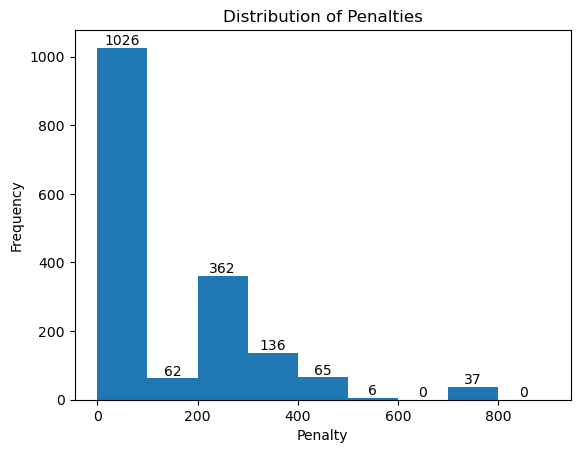

In [13]:
counts, bins, patches = plt.hist(penalties, bins=range(0, 901, 100))
plt.xlabel('Penalty')
plt.ylabel('Frequency')
plt.title('Distribution of Penalties')

# Add numbers on top of each bar
for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 50, count, str(int(count)), ha='center', va='bottom', fontsize=10)

plt.show()

In [38]:

def penalties_above_x(penalties, x):
    penalties_above_x = []
    for penalty in penalties:
        if penalty > x:
            penalties_above_x.append(penalty)
    #print(penalties_above_x)
    print(len(penalties_above_x))
    #print("Out of all penalties: ", len(penalties))
    print(f"This makes {len(penalties_above_x) / len(penalties) * 100} %")
thresh=300
print(f"Penalties above {thresh}: ")
penalties_above_x(penalties, thresh)
thresh=500
print(f"Penalties above {thresh}: ")
penalties_above_x(penalties, thresh)
print("Maximum penalty: ", max(penalties))


Penalties above 300: 
41
This makes 11.232876712328768 %
Penalties above 500: 
5
This makes 1.36986301369863 %
Maximum penalty:  709.0


In [24]:
# check final assignment list wiht SMILES
annot_path = "/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/smilestoatomtypestoselfies_dikt_22_8.pkl"
# read in pickle file
import pickle
with open(annot_path, "rb") as f:
    loaded_annot = pickle.load(f)

In [26]:
print(loaded_annot)
print(len(loaded_annot))

{'CC(C)NC(=S)N1CCOC(C)C1C': {'posToKeep': [0, 1, 3, 5, 6, 9, 11, 13, 14, 15, 16, 18, 20, 22], 'smi_clean': ['C', 'C', 'C', 'N', 'C', 'S', 'N', 'C', 'C', 'O', 'C', 'C', 'C', 'C'], 'atom_types': ['c3', 'c3', 'c3', 'ns', 'cs', 's', 'n', 'c3', 'c3', 'os', 'c3', 'c3', 'c3', 'c3'], 'max_penalty': 0.0, 'selfies': '[C][C][Branch1][C][C][N][C][=Branch1][C][=S][N][C][C][O][C][Branch1][C][C][C][Ring1][#Branch1][C]', 'selfies_toks': ['[C]', '[C]', '[Branch1]', '[C]', '[C]', '[N]', '[C]', '[=Branch1]', '[C]', '[=S]', '[N]', '[C]', '[C]', '[O]', '[C]', '[Branch1]', '[C]', '[C]', '[C]', '[Ring1]', '[#Branch1]', '[C]'], 'selfies_map': {(0, '[C]'): 0, (1, '[C]'): 1, (4, '[C]'): 3, (5, '[N]'): 5, (6, '[C]'): 6, (9, '[=S]'): 9, (10, '[N]'): 11, (11, '[C]'): 13, (12, '[C]'): 14, (13, '[O]'): 15, (14, '[C]'): 16, (17, '[C]'): 18, (18, '[C]'): 20, (21, '[C]'): 22}}, 'CC(C)NC(=S)N1CCO[C@@H](C)[C@H]1C': {'posToKeep': [0, 1, 3, 5, 6, 9, 11, 13, 14, 15, 16, 18, 20, 22], 'smi_clean': ['C', 'C', 'C', 'N', 'C', 'S

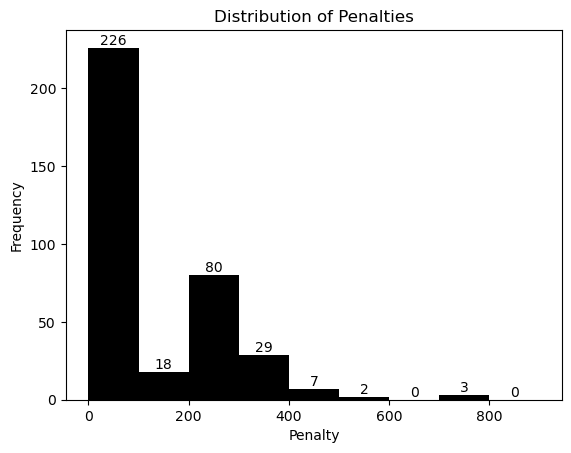

Penalties above 300: 
41
This makes 11.232876712328768 %
Max penalty used: 709.0
Min penalty: 0.0
Mean penalty:  120.0649315068493


In [39]:
# go through final dikt and add penalty to each SMILES or save them
new_dikt = {}
for smiles, info in loaded_annot.items():
    if smiles in loaded_dikt:
        #loaded_dikt[smiles]['max_penalty'] = info.get('penalty', 0)
        new_dikt[smiles] = loaded_dikt[smiles]['max_penalty']
    else:
        print("smiles not contained?")
# plot histogram of penalties in new dikt wiht range 0 to 100, 100 to 200 etc and occurrences
import matplotlib.pyplot as plt

penalties = [v for v in new_dikt.values() if v is not None]
#plt.hist(penalties, bins=range(0, 901, 100), color='k')
#plt.xlabel('Penalty')
#plt.ylabel('Frequency')
#plt.title('Distribution of Penalties')
#plt.show()


counts, bins, patches = plt.hist(penalties, bins=range(0, 901, 100), color='k')
plt.xlabel('Penalty')
plt.ylabel('Frequency')
plt.title('Distribution of Penalties')

# Add numbers on top of each bar
for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 50, count, str(int(count)), ha='center', va='bottom', fontsize=10)

plt.show()
thresh=300
print(f"Penalties above {thresh}: ")
penalties_above_x(penalties, thresh)
print("Max penalty used:", max(penalties))
print("Min penalty:", min(penalties))
print("Mean penalty: ", np.mean(penalties))

In [ ]:
# plo